
# "Loan Prediction III. Part1. Data Exploration and Preparing" 
---
## Author Oleksandr Kursik


# 1.Define the problem

This is an data exploration [Loan Prediction III contest](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/) 

## About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In this problem, we have to predict the Loan Status of a person based on his/ her profile.





In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
%matplotlib inline


In [38]:
import os;
default_path = os.getcwd()
path = "D:/Python-projects/LoanPrediction3/notebooks/"
print (default_path); # Prints the working directory
os.chdir(path)

D:\Python-projects\LoanPrediction3\notebooks


* Read the data and and look at them

In [39]:
df_train = pd.read_csv('../data/raw/train_u6lujuX_CVtuZ9i.csv', index_col=0)
df_train.shape


(614, 12)

In [40]:
df_train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


In [41]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 2. Prepare the Data

## 2.1.Data Description



### 2.1.1 Describe the extent of the data that is available
Variable | Description
-------- | -------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status| Loan approved (Y/N)

### 2.1.2 Describe data that is not available but is desirable
Let’s check if the data has any missing values in numerical variables and separate this quantity by fields:

In [42]:
df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 2.1.3. Visualize numerical data (Distribution analysis):

ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term


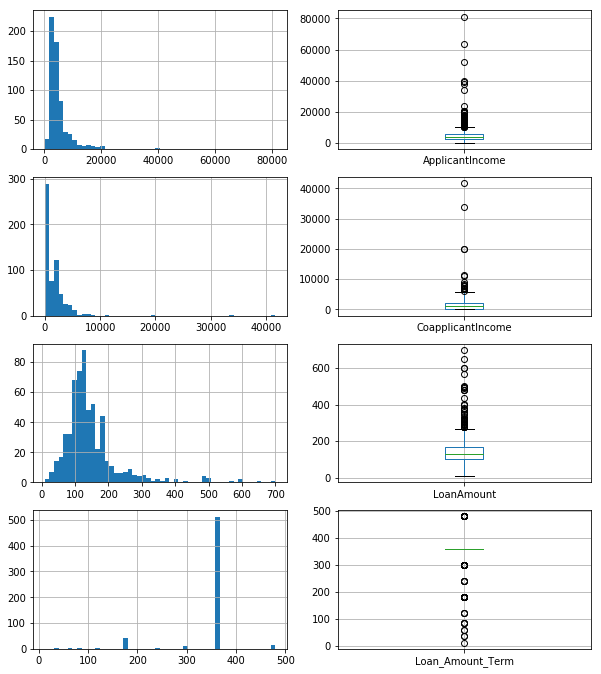

In [43]:
fig1 = plt.figure(figsize=(10,24))
ax1 = fig1.add_subplot(8,2,1)
df_train['ApplicantIncome'].hist(bins=50)
ax2 = fig1.add_subplot(8,2,2)
df_train.boxplot(column='ApplicantIncome')
ax3 = fig1.add_subplot(8,2,3)
df_train['CoapplicantIncome'].hist(bins=50)
ax4 = fig1.add_subplot(8,2,4)
df_train.boxplot(column='CoapplicantIncome')
ax5 = fig1.add_subplot(8,2,5)
df_train['LoanAmount'].hist(bins=50)
ax6 = fig1.add_subplot(8,2,6)
df_train.boxplot(column='LoanAmount')
ax7 = fig1.add_subplot(8,2,7)
df_train['Loan_Amount_Term'].hist(bins=50)
ax8 = fig1.add_subplot(8,2,8)
df_train.boxplot(column='Loan_Amount_Term')

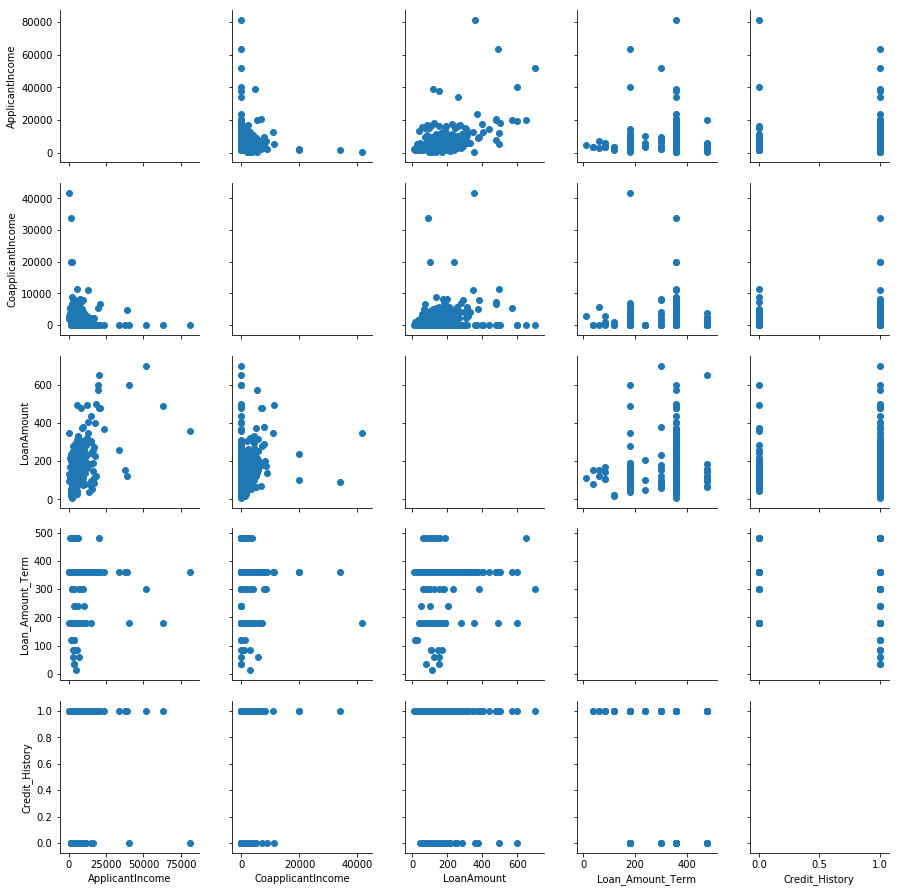

In [44]:
g = sns.PairGrid(df_train)
# g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)


### 2.1.4. Categorical variable analysis: 

Gender,	Married, Dependents, Education, Self_Employed, Credit_History, Property_Area

Text(0.5,1,'Property_Area')

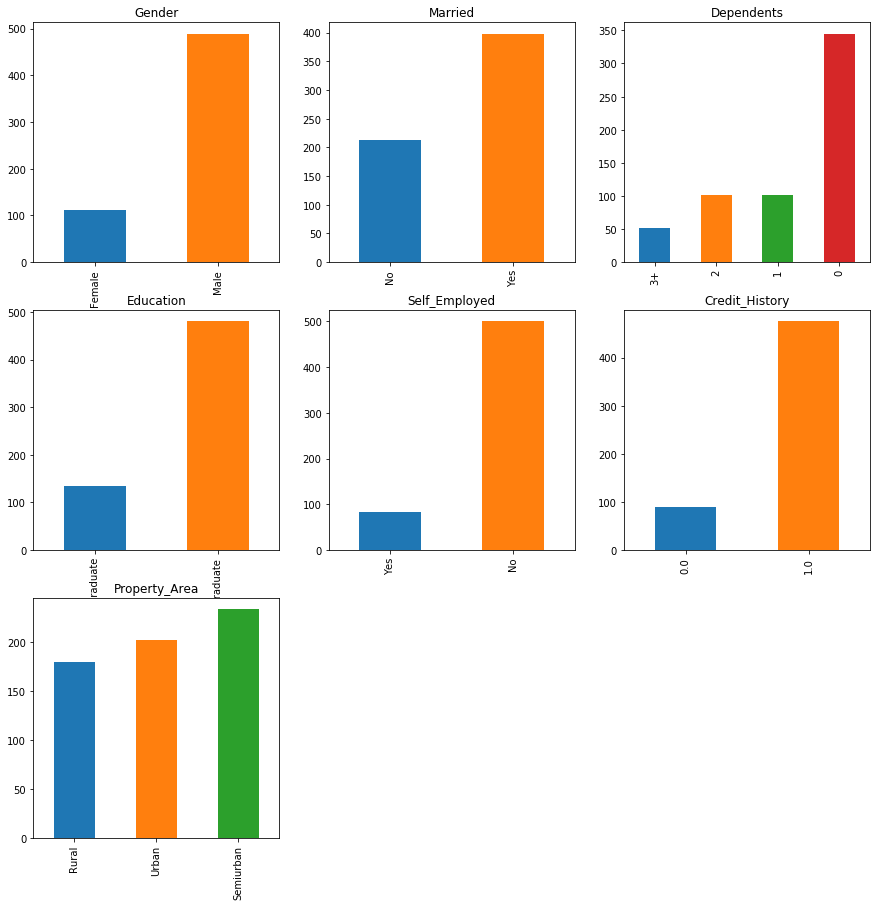

In [45]:
fig2 = plt.figure(figsize=(15,15))

ax1 = fig2.add_subplot(3,3,1)
gender_temp = df_train['Gender'].value_counts(ascending=True)
gender_temp.plot(kind='bar')
ax1.set_title("Gender")

ax2 = fig2.add_subplot(3,3,2)
married_temp = df_train['Married'].value_counts(ascending=True)
married_temp.plot(kind='bar')
ax2.set_title("Married")

ax3 = fig2.add_subplot(3,3,3)
dependents_temp = df_train['Dependents'].value_counts(ascending=True)
dependents_temp.plot(kind='bar')
ax3.set_title("Dependents")

ax4 = fig2.add_subplot(3,3,4)
education_temp = df_train['Education'].value_counts(ascending=True)
education_temp.plot(kind='bar')
ax4.set_title("Education")

ax5 = fig2.add_subplot(3,3,5)
self_employed_temp = df_train['Self_Employed'].value_counts(ascending=True)
self_employed_temp.plot(kind='bar')
ax5.set_title("Self_Employed")

ax6 = fig2.add_subplot(3,3,6)
credit_history_temp = df_train['Credit_History'].value_counts(ascending=True)
credit_history_temp.plot(kind='bar')
ax6.set_title("Credit_History")

ax7 = fig2.add_subplot(3,3,7)
property_area_temp = df_train['Property_Area'].value_counts(ascending=True)
property_area_temp.plot(kind='bar')
ax7.set_title("Property_Area")

In [46]:
temp1 = df_train['Credit_History'].value_counts(ascending=True)
temp2 = df_train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)

print ('\nProbability of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


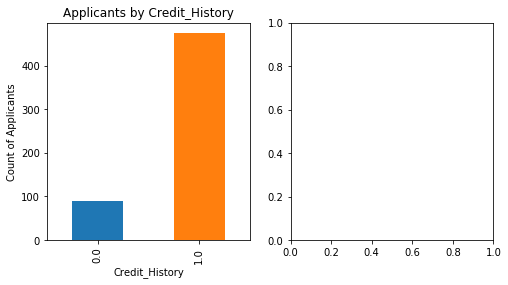

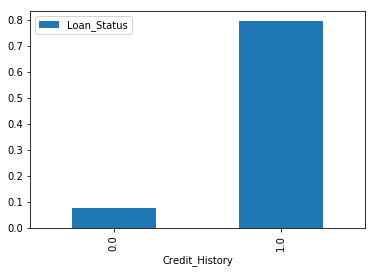

In [47]:
fig3 = plt.figure(figsize=(8,4))
ax1 = fig3.add_subplot(1,2,1)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')


ax2 = fig3.add_subplot(1,2,2)
temp2.plot(kind = 'bar')
#ax2.set_xlabel('Credit_History')
#ax2.set_ylabel('Probability of getting loan')
#ax2.set_title("Probability of getting loan by credit history")


## 2.2 Data Processing

### 2.2.1. Make features space


In [48]:
# recode and save outcome vector
y = df_train['Loan_Status'].map({'N': 0, 'Y': 1})
del df_train['Loan_Status']
print ('Length of outcome vector: ', len(y))


Length of outcome vector:  614


In [49]:
df_test = pd.read_csv('../data/raw/test_Y3wMUE5_7gLdaTN.csv', index_col=0)
print('Sizes', df_train.shape, df_test.shape)


Sizes (614, 11) (367, 11)


In [50]:
# all in one dataframe
df = pd.concat([df_train, df_test])
df.shape

(981, 11)

In [51]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

### 2.2.2. Constructing functions which needed for feature engineering 

In [52]:
from statistics import median, mode

def if_else(condition, a, b):
    if condition:
        return a
    else:
        return b

def make_time_features(data):
    """
    make datetime features (but not in this case)
    """
    return (data, tm)

def make_null_features(data):
    """
    replace missing value
    """
    # replace in Dependents NA -> '0'
    data['Dependents'] = data['Dependents'].fillna('0')
    
    # replace in Married NA -> "No"
    data['Married']=data['Married'].fillna('No')
    
    # replace in Gender NA -> "Male"
    data['Gender'] = data['Gender'].fillna('Male')
    
    # replace in Self_Employed NA -> "Yes" if ApplicantIncome >0 else 'No'
    data.loc[data.ApplicantIncome > 0,  'Self_Employed']= \
        data.loc[df.ApplicantIncome > 0,  'Self_Employed'].fillna('Yes')
    data.loc[data.ApplicantIncome <= 0,  'Self_Employed']= \
        data.loc[df.ApplicantIncome <= 0,  'Self_Employed'].fillna('No')
    
    # replace in Loan_Amount NA -> median(Loan_Amount)    
    data['LoanAmount']= data['LoanAmount'].fillna(median(data['LoanAmount']))
    
    # replace in Loan_Amount_Term NA -> mode(Loan_Amount_Term)    
    data['Loan_Amount_Term']= data['Loan_Amount_Term'].fillna(mode(data['Loan_Amount_Term']))
    
    # replace in Credit_History NA -> "Yes"
    data['Credit_History']=data['Credit_History'].fillna(1)

    return data





def make_calc_features(data):
    """
    feature engineering 
    """
    # calculate FamilySize
    data['numDependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
    data['FamilySize'] = data.apply(lambda x: x.numDependents + 2 if x.CoapplicantIncome > 0 or x.Married == 'Yes'\
                           else x.numDependents + 1, axis =1)
    del data['numDependents']
    
    # calculate TotalIncome
    data['TotalIncome'] = data.ApplicantIncome + data.CoapplicantIncome
    
    # calculate TotalIncomePerson
    data['TotalIncomePerson'] = data.TotalIncome / data.FamilySize
    
    # calculate DTI
    data['DTI'] = data.LoanAmount / data.TotalIncome 
    
    # calculate DTI by person
    data['DTI_person'] = data.LoanAmount / (data.TotalIncome / data.FamilySize)
    
    # calculate LoanAmountMonth monthly
    data['LoanAmountMonth'] = data.LoanAmount / data.Loan_Amount_Term
    
    # calculate DTI_month
    data['DTI_month'] = data.LoanAmountMonth / data.TotalIncome 
    
    # calculate DTI_month by person
    data['DTI_month_person'] = data.LoanAmountMonth / (data.TotalIncome / data.FamilySize)
        
    return data
    
    

log_features = ['LOG_ApplicantIncome',
                'LOG_CoapplicantIncome',
                'LOG_LoanAmount',
                'LOG_Loan_Amount_Term',
                'LOG_TotalIncome',
                'LOG_TotalIncomePerson',
                'LOG_LoanAmountMonth',
                'LOG_DTI',
                'LOG_DTI_person',
                'LOG_DTI_month',
                'LOG_DTI_month_person'   
               ]

def make_logs(data, log_features):
    """
    log(features)
    """
    for name in log_features:
        data[name] = np.log(data[name[4:]].abs() + 1)  # 'LOG_' +

    return data

def make_str_features(data):
    """
    recode string features to numeric
    """
    data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
    data['Married'] = data['Married'].map({'Yes': 1, 'No': 0})
    data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
    data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
    data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No': 0})
    data['Property_Area'] = data['Property_Area'].map({'Urban': 1, 'Semiurban': 2, 'Rural': 3})

    return data

### 2.2.3. Check missing values in the dataset

In [53]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [54]:
#replace NA 
df= make_null_features(df)
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### 2.2.4. Make new variables

In [55]:
df = make_calc_features(df)

In [56]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,FamilySize,TotalIncome,TotalIncomePerson,DTI,DTI_person,LoanAmountMonth,DTI_month,DTI_month_person
Loan_ID,,,,,,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,225.0,360.0,1.0,Urban,1,5849.0,5849.000000,0.038468,0.038468,0.625000,0.000107,0.000107
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,3,6091.0,2030.333333,0.021015,0.063044,0.355556,0.000058,0.000175
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,2,3000.0,1500.000000,0.022000,0.044000,0.183333,0.000061,0.000122
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,2,4941.0,2470.500000,0.024287,0.048573,0.333333,0.000067,0.000135
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,6000.000000,0.023500,0.023500,0.391667,0.000065,0.000065
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,4,9613.0,2403.250000,0.027775,0.111100,0.741667,0.000077,0.000309
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,2,3849.0,1924.500000,0.024682,0.049363,0.263889,0.000069,0.000137
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,5,5540.0,1108.000000,0.028520,0.142599,0.438889,0.000079,0.000396
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,4,5532.0,1383.000000,0.030369,0.121475,0.466667,0.000084,0.000337


### 2.2.5. Make log features

In [57]:
df = make_logs(df, log_features)


### 2.2.5. Make string features (as numeric)

In [58]:
df = make_str_features(df)

In [59]:
# check NA
df.apply(lambda x: sum(x.isnull()),axis=0)

Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
FamilySize               0
TotalIncome              0
TotalIncomePerson        0
DTI                      0
DTI_person               0
LoanAmountMonth          0
DTI_month                0
DTI_month_person         0
LOG_ApplicantIncome      0
LOG_CoapplicantIncome    0
LOG_LoanAmount           0
LOG_Loan_Amount_Term     0
LOG_TotalIncome          0
LOG_TotalIncomePerson    0
LOG_LoanAmountMonth      0
LOG_DTI                  0
LOG_DTI_person           0
LOG_DTI_month            0
LOG_DTI_month_person     0
dtype: int64

### 2.3 Resizing data



### 2.3.1. Correlation matrix

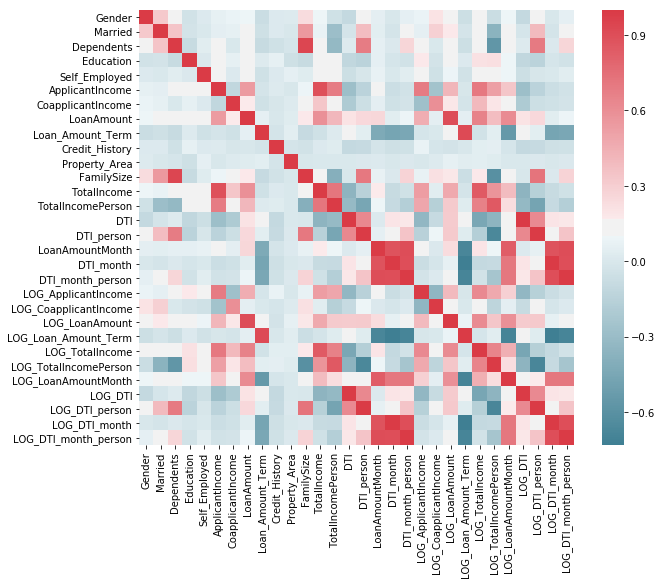

In [60]:
#View correlations on heatmap
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)



In [61]:
def drop_correlated_features(df, corr_treshhold = 0.95):
    # Create correlation matrix
    corr_matrix = df.corr().abs()
    #print(corr_matrix)
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than corr_treshhold
    to_drop = [column for column in upper.columns if any(upper[column] > corr_treshhold)]
    print("Columns were droped: ", to_drop)
    df.drop(columns = to_drop, axis=1)
    return df

In [62]:
# Drop features 
df = drop_correlated_features(df)


Columns were droped:  ['LOG_DTI', 'LOG_DTI_person', 'LOG_DTI_month', 'LOG_DTI_month_person']


### 2.3.2.  ‘WOEization’ of continuous variables
We will start with cont. variables first of all. Factors are already discretized. To do this I am going to use functions from library woeBinning.

Let’s define an auxiliary function.

## 2.3. Divide data on train and test again and save

In [63]:
data_train = df[df.index.isin(df_train.index)]
data_test = df[df.index.isin(df_test.index)]
print(data_train.shape, data_test.shape)

data_tmp = data_train.copy()
data_tmp['y'] = y


data_tmp.to_csv('../data/processed/train_ready.csv', index=False)
data_test.to_csv('../data/processed/test_ready.csv', index=False)

(614, 30) (367, 30)


In [64]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 31 columns):
Gender                   614 non-null int64
Married                  614 non-null int64
Dependents               614 non-null int64
Education                614 non-null int64
Self_Employed            614 non-null int64
ApplicantIncome          614 non-null int64
CoapplicantIncome        614 non-null float64
LoanAmount               614 non-null float64
Loan_Amount_Term         614 non-null float64
Credit_History           614 non-null float64
Property_Area            614 non-null int64
FamilySize               614 non-null int64
TotalIncome              614 non-null float64
TotalIncomePerson        614 non-null float64
DTI                      614 non-null float64
DTI_person               614 non-null float64
LoanAmountMonth          614 non-null float64
DTI_month                614 non-null float64
DTI_month_person         614 non-null float64
LOG_ApplicantIncome      614 n

In [65]:
def get_features_and_labels(frame):
    '''
    Transforms and scales the input data and returns numpy arrays for
    training and testing inputs and targets.
    '''

    # Replace missing values with 0.0, or we can use
    # scikit-learn to calculate missing values (below)
    #frame[frame.isnull()] = 0.0

    # Convert values to floats
    arr = np.array(frame, dtype=np.float)

    # Use the last column as the target value
    X, y = arr[:, :-1], arr[:, -1]
    # To use the first column instead, change the index value
    #X, y = arr[:, 1:], arr[:, 0]
    
    # Use 80% of the data for training; test against the rest
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # sklearn.pipeline.make_pipeline could also be used to chain 
    # processing and classification into a black box, but here we do
    # them separately.
    
    # If values are missing we could impute them from the training data
    #from sklearn.preprocessing import Imputer
    #imputer = Imputer(strategy='mean')
    #imputer.fit(X_train)
    #X_train = imputer.transform(X_train)
    #X_test = imputer.transform(X_test)
    
    # Normalize the attribute values to mean=0 and variance=1
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    # To scale to a specified range, use MinMaxScaler
    #from sklearn.preprocessing import MinMaxScaler
    #scaler = MinMaxScaler(feature_range=(0, 1))
    
    # Fit the scaler based on the training data, then apply the same
    # scaling to both training and test sets.
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Return the training and test sets
    return X_train, X_test, y_train, y_test


trainSet, testSet, y_train, y_test = get_features_and_labels (data_tmp )


# 3. Building a Predictive Models

## 3.1.

Evaluating classifiers
LR: ROC_AUC on CV 0.766052 (0.044550) ; ROC_AUC on testSet: 0.669880 
RF: ROC_AUC on CV 0.783993 (0.060553) ; ROC_AUC on testSet: 0.683735 
XGB: ROC_AUC on CV 0.776957 (0.056305) ; ROC_AUC on testSet: 0.670783 
LGB: ROC_AUC on CV 0.791102 (0.051702) ; ROC_AUC on testSet: 0.677711 
Plotting the results


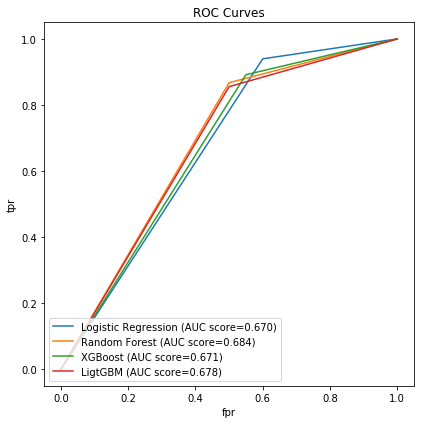

In [66]:
def evaluate_classifier(X_train, X_test, y_train, y_test):
    '''
    Run multiple times with different classifiers to get an idea of the
    relative performance of each configuration.

    Returns a sequence of tuples containing:
        (title, precision, recall)
    for each learner.
    '''

    from sklearn.model_selection import KFold, StratifiedKFold
    from sklearn.model_selection import cross_val_score
    
    # Import some classifiers to test
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier
    from lightgbm import LGBMClassifier
    
    # We will calculate the P-R curve for each classifier
    from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, roc_auc_score, roc_curve, auc
    
    #
   
    models = []
    seed = 7
    
    scoring = 'roc_auc'
    #scoring = {'acc': 'accuracy','AUC': 'roc_auc'}
    
    kfold =  StratifiedKFold(n_splits=10, random_state=seed)
    
    # Here we create classifiers with default parameters. These need
    # to be adjusted to obtain optimal performance on your data set.
    
    # Test the logistoc regression classifier
    model = LogisticRegression ()
    name='LR'
    # Fit the classifier
    model.fit(X_train, y_train)
    
    #Cross validation result   
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
           
    #Result on testSet 
    #calculate ROC_AUC
    auc_score = roc_auc_score(y_test, model.predict(X_test))
    # Generate the ROC curve
    fpr, tpr, threshold = roc_curve(y_test, model.predict(X_test))
     
    msg = "%s: %s %f (%f) %s: %f " % (name, "ROC_AUC on CV", cv_results.mean(), cv_results.std(),
                                      "; ROC_AUC on testSet", auc_score)
    print(msg)
    # Include the score in the title
    yield 'Logistic Regression (AUC score={:.3f})'.format(auc_score), fpr, tpr, threshold
    # #####################################################################################
    

    # Test the Random rForest classifier
    model = RandomForestClassifier(n_estimators=100)

    name='RF'
    # Fit the classifier
    model.fit(X_train, y_train)
    
    #Cross validation result   
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    #print(cv_results)

    
    
     
    #Result on testSet 
    #calculate ROC_AUC
    auc_score = roc_auc_score(y_test, model.predict(X_test))
    # Generate the ROC curve
    fpr, tpr, threshold = roc_curve(y_test, model.predict(X_test))
      
    msg = "%s: %s %f (%f) %s: %f " % (name, "ROC_AUC on CV", cv_results.mean(), cv_results.std(),
                                      "; ROC_AUC on testSet", auc_score)
    print(msg)
    # Include the score in the title
    yield 'Random Forest (AUC score={:.3f})'.format(auc_score), fpr, tpr, threshold
    # #####################################################################################

    # Test the XGBoost classifier
    model = XGBClassifier()

    name = 'XGB'
    # Fit the classifier
    model.fit(X_train, y_train)
    
    #Cross validation result   
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    #print(cv_results)
    
    #Result on testSet 
    #calculate ROC_AUC
    auc_score = roc_auc_score(y_test, model.predict(X_test))
    # Generate the ROC curve
    fpr, tpr, threshold = roc_curve(y_test, model.predict(X_test))
      
    msg = "%s: %s %f (%f) %s: %f " % (name, "ROC_AUC on CV", cv_results.mean(), cv_results.std(),
                                      "; ROC_AUC on testSet", auc_score)
    print(msg)
    # Include the score in the title
    yield 'XGBoost (AUC score={:.3f})'.format(auc_score), fpr, tpr, threshold
    # #####################################################################################

    # Test the LigtGBM classifier
    model = LGBMClassifier()
    name = 'LGB'
    # Fit the classifier
    model.fit(X_train, y_train)
    
    # Cross validation result   
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    # print(cv_results)
    
    # Result on testSet 
    # calculate ROC_AUC
    auc_score = roc_auc_score(y_test, model.predict(X_test))
    # Generate the ROC curve
    fpr, tpr, threshold = roc_curve(y_test, model.predict(X_test))
    msg = "%s: %s %f (%f) %s: %f " % (name, "ROC_AUC on CV", cv_results.mean(), cv_results.std(),
                                      "; ROC_AUC on testSet", auc_score)
    print(msg)
    # Include the score in the title
    yield 'LigtGBM (AUC score={:.3f})'.format(auc_score), fpr, tpr, threshold
    # #####################################################################################


    # =====================================================================

    
    
    
def plot(results):
    '''
    Create a plot comparing multiple learners.

    `results` is a list of tuples containing:
        (title, fpr, tpr)
    
    All the elements in results will be plotted.
    '''

    # Plot the ROC curves

    fig = plt.figure(figsize=(6, 6))
    fig.canvas.set_window_title('Classifying data')

    for label, fpr, tpr, _ in results:
        plt.plot(fpr, tpr, label=label)
        
        
    plt.title('ROC Curves')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.legend(loc='lower left')

    # Let matplotlib improve the layout
    plt.tight_layout()

    # ==================================
    # Display the plot in interactive UI
    plt.show()

    # To save the plot to an image file, use savefig()
    #plt.savefig('plot.png')

    # Open the image file with the default image viewer
    #import subprocess
    #subprocess.Popen('plot.png', shell=True)

    # To save the plot to an image in memory, use BytesIO and savefig()
    # This can then be written to any stream-like object, such as a
    # file or HTTP response.
    #from io import BytesIO
    #img_stream = BytesIO()
    #plt.savefig(img_stream, fmt='png')
    #img_bytes = img_stream.getvalue()
    #print('Image is {} bytes - {!r}'.format(len(img_bytes), img_bytes[:8] + b'...'))

    # Closing the figure allows matplotlib to release the memory used.
    plt.close()

    
    
    
    
# Evaluate multiple classifiers on the data
print("Evaluating classifiers")
results = list(evaluate_classifier(trainSet, testSet, y_train, y_test))

# Display the results
print("Plotting the results")
plot(results)
    
    
 
